# <span style="color:green">C-nets</span>

##### This document enables to mine a process model in C-nets language based on an event log. 

C-nets is an expressive language created specifically for project mining that can handle noise and concurrency. It features process elements in a simple and effective manner by using bindings to depict AND-, XOR-, and OR- split and join patterns.

The requirements to use this module are as follows.

In [1]:


f = !cat "requirements.txt"
display(f)

['numpy==1.26.4', 'pandas==2.2.2', 'pygraphviz==1.11']

</br>
The log file should be in csv format and contain a flattened event log of a process, which means that all events in the log are related to only one process object identified by their caseID. 

You can find an example log file [here](./logcnet2.csv). The file contents should follow the schema below and columns should have no headers.

SCHEMA

caseID; task; user; timestamp 

</br>
</br>


Let us start by importing the modules needed.

In [2]:
import os
from collections import OrderedDict
import pandas as pd
import numpy as np
from collections import namedtuple
import pygraphviz as pgv
from PIL import Image

In [3]:
from import_log import *
from dep_matrix import *
from dep_graph import *
from bindings import *
from replay import *
from depgraph_visualization import *
from visualization import *

#### <span style="color:green">Step 1 - Read log and generate the dependency matrix</span>

Substitute the path to your file in the code below. Make sure to have it inside quotation marks " ".
Example:
path = "/Users/your_name/your_folder/logcnet2.csv"

In [4]:
path = "logcnet2.csv"
#path = "long_distance.csv"

In [5]:
pd.read_csv("/Users/ednira/Documents/My_Masters/0_THESIS/event_logs/logcnet2.csv")
#pd.read_csv("/Users/ednira/Documents/My_Masters/0_THESIS/event_logs/long_distance.csv")

,case:concept:name,concept:name,user,time:timestamp
0,1,a,u1,2016-04-09 17:36:47
1,1,e,u3,2016-04-11 09:11:13
2,2,a,u2,2016-04-14 08:56:09
3,2,e,u3,2016-04-14 09:36:02
4,3,a,u5,2016-04-15 10:16:40
...,...,...,...,...
134,40,a,u6,2016-04-12 10:00:12
135,40,d,u7,2016-04-12 18:21:32
136,40,d,u8,2016-04-13 13:27:41
137,40,d,u6,2016-04-18 19:14:14


The log is read. So, the activities, frequencies, dependencies, and bindings are mined, based on defined thresholds.

The default dependency threshold is **0.90**

In [10]:

log = read_log(path)
activities = activity_frequencies(log)

act_total = activity_total(log)

freq = frequencies(activities)

dep = dependency_matrix(freq)

dep_dict = dependency_dict(dep)

best = best_dependency(dep_dict)

alltraces = traces(log)

long = long_distance_dependency(act_total, alltraces)

depgraph, end, start, or_start, or_end = dependency_graph(act_total,activities,dep_dict, long, dependency_threshold=0.9)

pygraph_visualization(depgraph, act_total, activities, dep_dict)

in_arcs = input_arcs(depgraph)
out_arcs = output_arcs(depgraph)

output, cnet_outbindings = output_bindings(alltraces, out_arcs, in_arcs)

input, cnet_inbindings = input_bindings(alltraces, out_arcs, in_arcs)


print(log)
print('activities:')
print(activities)
print('FREQUENCIES:')
print(freq)

{'1': [('a', 'u1', '2016-04-09 17:36:47'), ('e', 'u3', '2016-04-11 09:11:13')], '2': [('a', 'u2', '2016-04-14 08:56:09'), ('e', 'u3', '2016-04-14 09:36:02')], '3': [('a', 'u5', '2016-04-15 10:16:40'), ('e', 'u6', '2016-04-19 15:39:15')], '4': [('a', 'u7', '2016-04-20 14:39:45'), ('e', 'u8', '2016-04-22 09:16:16')], '5': [('a', 'u8', '2016-04-22 09:16:16'), ('e', 'u1', '2016-04-26 12:19:46')], '6': [('a', 'u2', '2016-04-25 08:39:24'), ('b', 'u4', '2016-04-29 10:56:14'), ('c', 'u1', '2016-04-30 15:41:22'), ('e', 'u7', '2016-05-12 18:21:32')], '7': [('a', 'u2', '2016-04-25 08:39:24'), ('b', 'u4', '2016-04-29 10:56:14'), ('c', 'u1', '2016-04-30 15:41:22'), ('e', 'u7', '2016-05-12 18:21:32')], '8': [('a', 'u2', '2016-04-25 08:39:24'), ('b', 'u4', '2016-04-29 10:56:14'), ('c', 'u1', '2016-04-30 15:41:22'), ('e', 'u7', '2016-05-12 18:21:32')], '9': [('a', 'u2', '2016-04-25 08:39:24'), ('b', 'u4', '2016-04-29 10:56:14'), ('c', 'u1', '2016-04-30 15:41:22'), ('e', 'u7', '2016-05-12 18:21:32')], 

In the event log, these are the activities:

In [7]:


print("Activities: " + str(list(activities.keys())))

Activities: ['a', 'e', 'b', 'c', 'd']


And the traces:

In [8]:


print(alltraces)

{'1': ['a', 'e'], '2': ['a', 'e'], '3': ['a', 'e'], '4': ['a', 'e'], '5': ['a', 'e'], '6': ['a', 'b', 'c', 'e'], '7': ['a', 'b', 'c', 'e'], '8': ['a', 'b', 'c', 'e'], '9': ['a', 'b', 'c', 'e'], '10': ['a', 'b', 'c', 'e'], '11': ['a', 'b', 'c', 'e'], '12': ['a', 'b', 'c', 'e'], '13': ['a', 'b', 'c', 'e'], '14': ['a', 'b', 'c', 'e'], '15': ['a', 'b', 'c', 'e'], '16': ['a', 'c', 'b', 'e'], '17': ['a', 'c', 'b', 'e'], '18': ['a', 'c', 'b', 'e'], '19': ['a', 'c', 'b', 'e'], '20': ['a', 'c', 'b', 'e'], '21': ['a', 'c', 'b', 'e'], '22': ['a', 'c', 'b', 'e'], '23': ['a', 'c', 'b', 'e'], '24': ['a', 'c', 'b', 'e'], '25': ['a', 'c', 'b', 'e'], '26': ['a', 'b', 'e'], '27': ['a', 'c', 'e'], '28': ['a', 'd', 'e'], '29': ['a', 'd', 'e'], '30': ['a', 'd', 'e'], '31': ['a', 'd', 'e'], '32': ['a', 'd', 'e'], '33': ['a', 'd', 'e'], '34': ['a', 'd', 'e'], '35': ['a', 'd', 'e'], '36': ['a', 'd', 'e'], '37': ['a', 'd', 'e'], '38': ['a', 'd', 'd', 'e'], '39': ['a', 'd', 'd', 'e'], '40': ['a', 'd', 'd', 'd',

The frequency matrix is calculated:

In [9]:
print(freq)

    e     b     c     d    a
a   5  11.0  11.0  13.0  0.0
e   0   0.0   0.0   0.0  0.0
b  11   0.0  10.0   0.0  0.0
c  11  10.0   0.0   0.0  0.0
d  13   0.0   0.0   4.0  0.0


</br>
Then, the dependency measure is calculated based on the formula

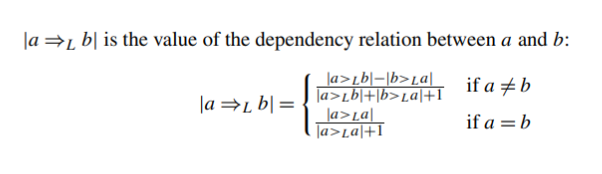

This is the dependency matrix:

In [10]:
print(dep)

          e         b         c         d         a
a  0.833333  0.916667  0.916667  0.928571       0.0
e       0.0 -0.916667 -0.916667 -0.928571 -0.833333
b  0.916667       0.0       0.0       0.0 -0.916667
c  0.916667       0.0       0.0       0.0 -0.916667
d  0.928571       0.0       0.0       0.8 -0.928571


#### <span style="color:green">Step 2 - C-nets bindings</span>

Here are the input and output bindings:

In [11]:


print('CNETS INPUT BINDINGS')
print(cnet_inbindings)
print()
print('CNETS OUTPUT BINDINGS')
print(cnet_outbindings)

CNETS INPUT BINDINGS
{'a': {}, 'e': {('b', 'c'): 20, ('b',): 1, ('c',): 1, ('d',): 13}, 'b': {('a',): 11}, 'c': {('a',): 11}, 'd': {('a',): 13}}

CNETS OUTPUT BINDINGS
{'a': {('b', 'c'): 20, ('b',): 1, ('c',): 1, ('d',): 13}, 'e': {}, 'b': {('e',): 11}, 'c': {('e',): 11}, 'd': {('e',): 13}}


#### <span style="color:green">Step 3 - Visualize the Dependency Graph</span>

Visualization of the dependency graph mined from the log:



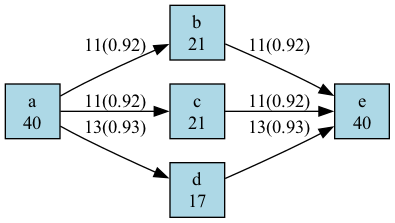

In [12]:


img = Image.open("graph_cnet_frequencies.png")
display(img)

#### <span style="color:green">Step 4 - Visualize the C-nets</span>

Replaying the traces on the dependency graph generates the C-nets:

In [12]:


visualization(depgraph, act_total, activities, dep_dict, cnet_inbindings, cnet_outbindings)